In [1]:
# Install core libraries for data analysis and ML
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configure display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [ ]:
data_path = "data/cumulative_2025.10.04_10.23.26.csv"

# Load dataset
df = pd.read_csv(data_path)

# Preview the first few rows
df.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

In [16]:
df['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

In [17]:
df['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

In [19]:
df_mismatch = df[df['koi_disposition'] != df['koi_pdisposition']]
df_mismatch[['koi_disposition', 'koi_pdisposition']]


,koi_disposition,koi_pdisposition
0,CONFIRMED,CANDIDATE
1,CONFIRMED,CANDIDATE
4,CONFIRMED,CANDIDATE
5,CONFIRMED,CANDIDATE
6,CONFIRMED,CANDIDATE
...,...,...
8817,CONFIRMED,CANDIDATE
8956,CONFIRMED,CANDIDATE
9014,CONFIRMED,CANDIDATE
9083,CONFIRMED,CANDIDATE


In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

rowid                 0
kepid                 0
kepoi_name            0
kepler_name        6817
koi_disposition       0
                   ... 
koi_dicco_mdec      599
koi_dicco_msky      599
koi_dikco_mra       570
koi_dikco_mdec      570
koi_dikco_msky      570
Length: 83, dtype: int64

In [52]:
# Keep only CONFIRMED and FALSE POSITIVE rows
df_filtered = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Check how many rows remain
print("Remaining rows:", len(df_filtered))
print(df_filtered['koi_disposition'].value_counts())

df_filtered['label'] = df_filtered['koi_disposition'].map({
    'CONFIRMED': 1,
    'FALSE POSITIVE': 0
})


Remaining rows: 7585
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
Name: count, dtype: int64


In [78]:
keep_cols = [
    # Target
    'koi_disposition', 'label',

    # Planetary / Transit features
    'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
    'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl',
    'koi_teq', 'koi_insol', 'koi_dor', 'koi_model_snr', 'koi_count',
    'koi_num_transits', 'koi_max_sngle_ev', 'koi_max_mult_ev',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',

    # Stellar parameters
    'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass',

    # Photometric magnitudes (optional brightness indicators)
    'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag',
    'koi_jmag', 'koi_hmag', 'koi_kmag'
]

In [79]:
df_binary = df_filtered[keep_cols].copy()

# Drop text target column
df_binary.drop(columns=['koi_disposition'], inplace=True)

print("✅ Clean dataset shape:", df_binary.shape)
df_binary.head()

✅ Clean dataset shape: (7585, 36)


,label,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_model_snr,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,1,9.488036,170.538750,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,35.8,2,142.0,5.135849,28.470820,0,0,0,0,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,1,54.418383,162.513840,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,25.8,2,25.0,7.027669,20.109507,0,0,0,0,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
3,0,1.736952,170.307565,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,505.6,1,621.0,39.066550,541.895100,0,1,0,0,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,1,2.525592,171.595550,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,40.9,1,515.0,4.749945,33.191900,0,0,0,0,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
5,1,11.094321,171.201160,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,66.5,3,95.0,9.046456,55.204865,0,0,0,0,6046.0,4.486,-0.08,0.972,1.053,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132


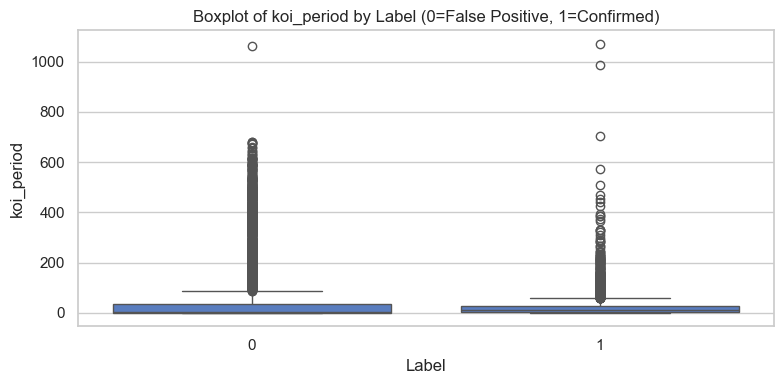

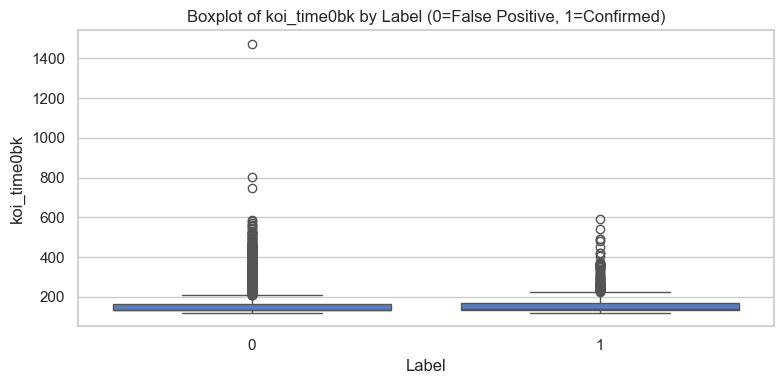

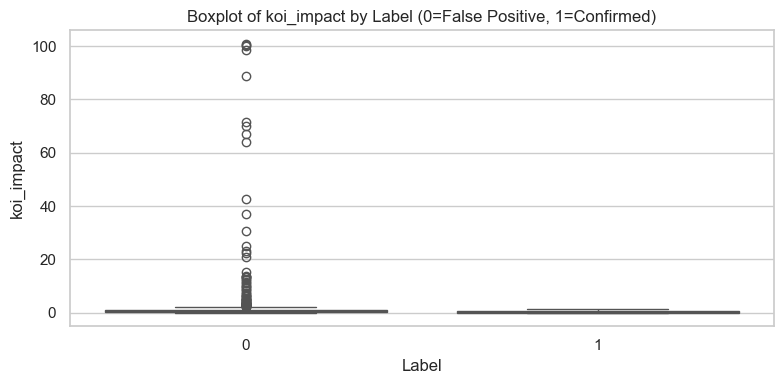

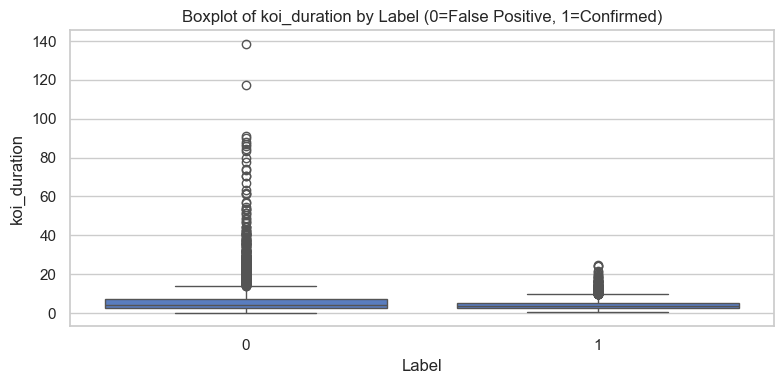

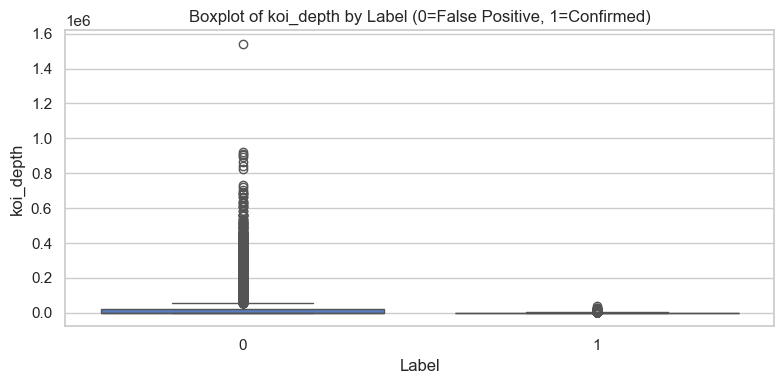

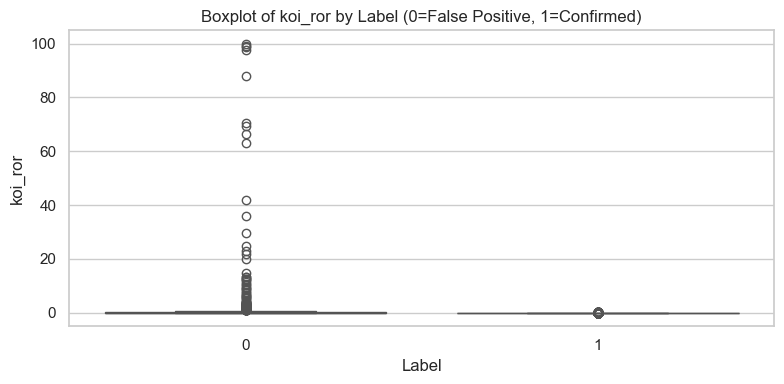

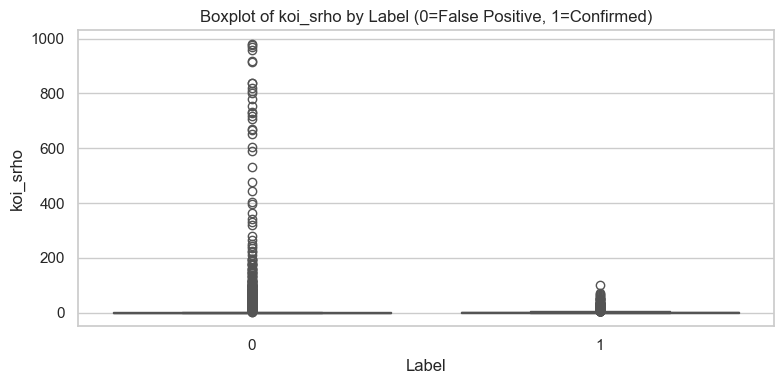

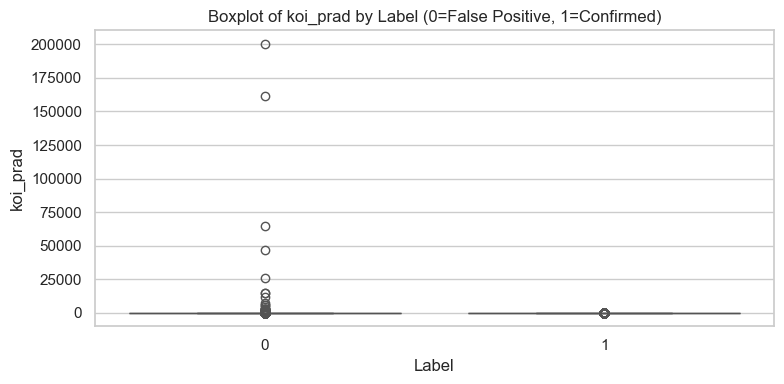

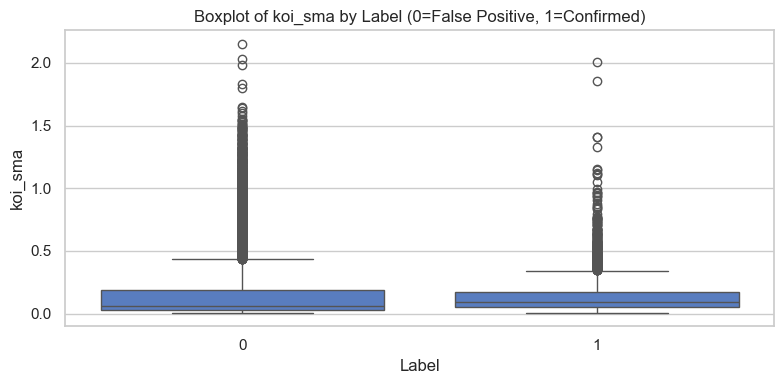

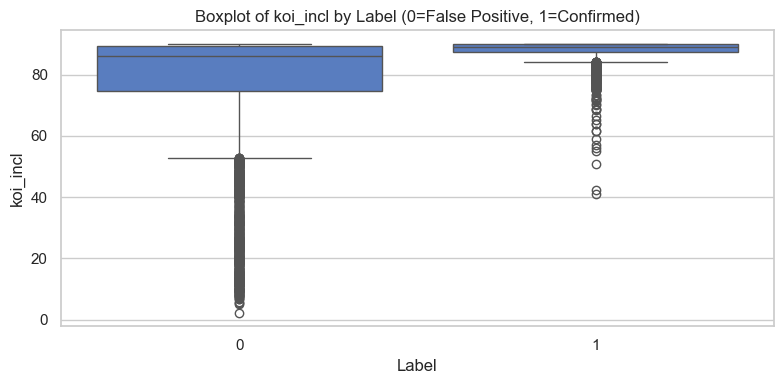

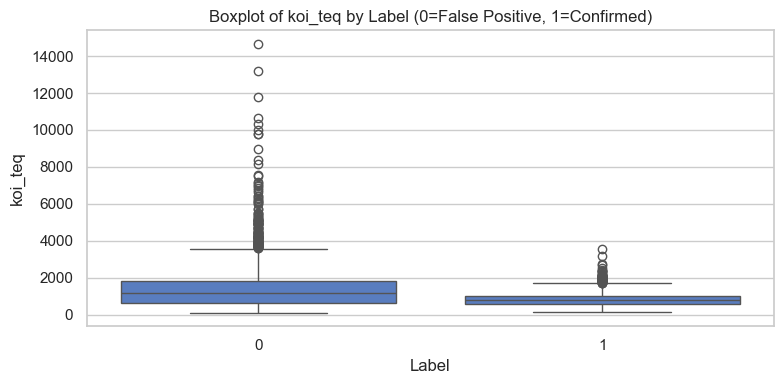

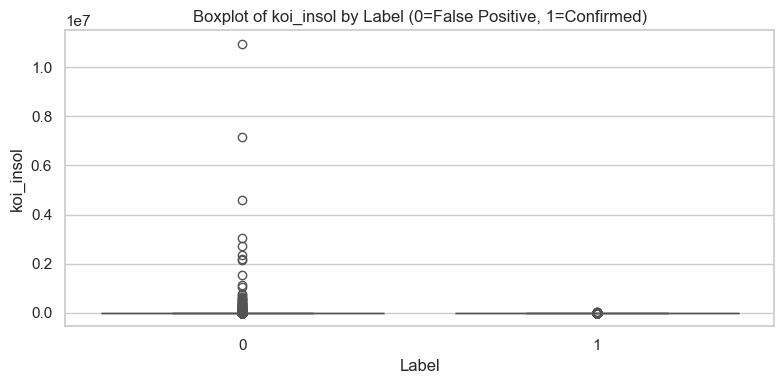

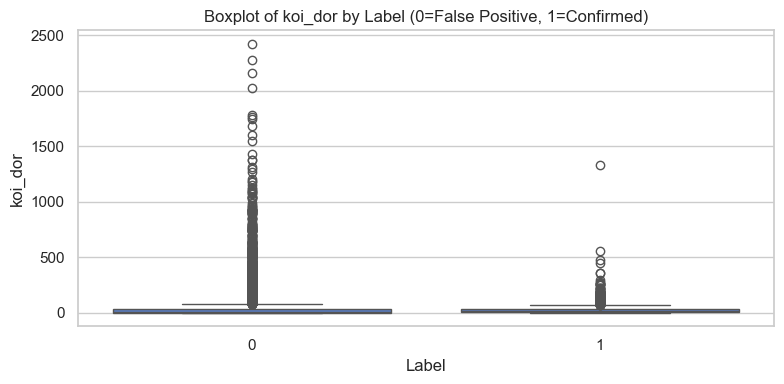

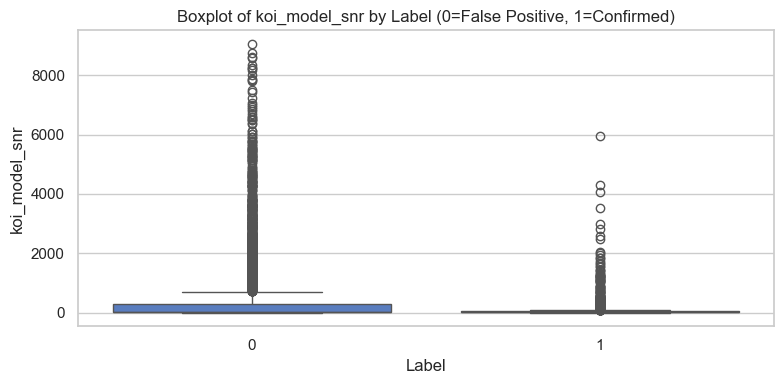

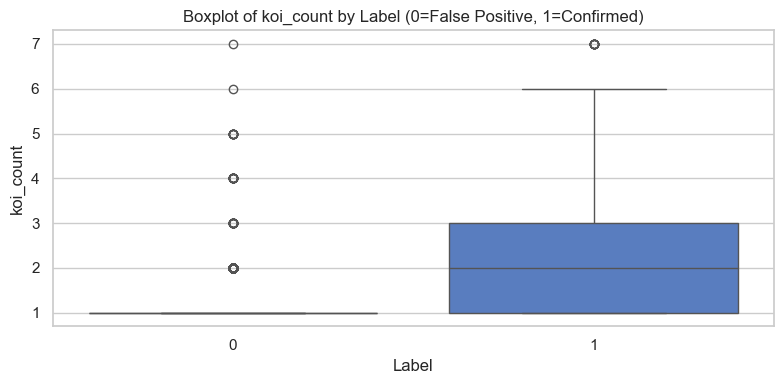

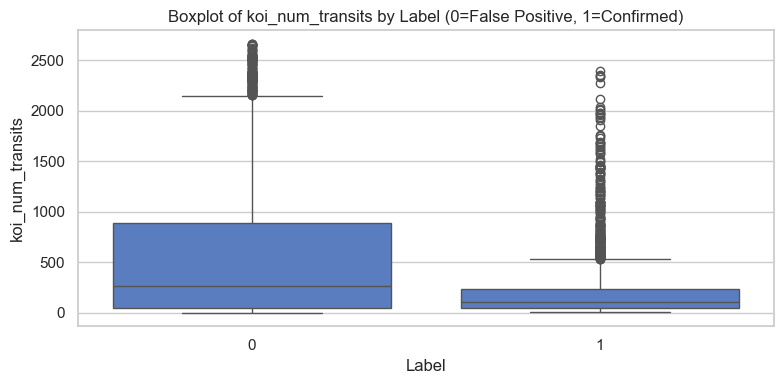

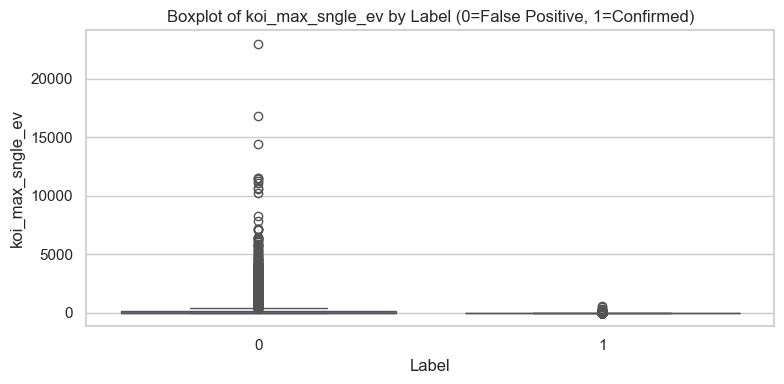

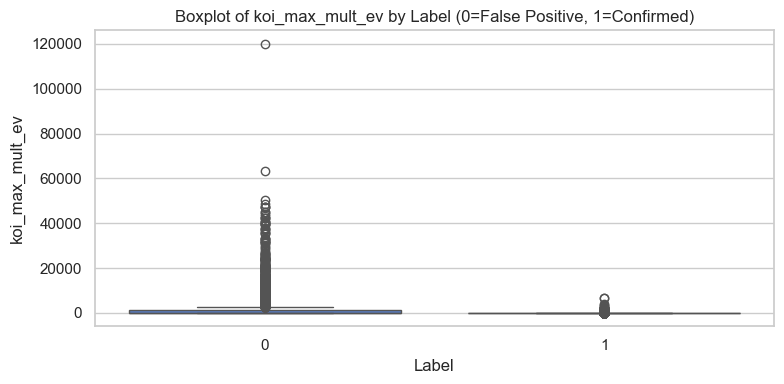

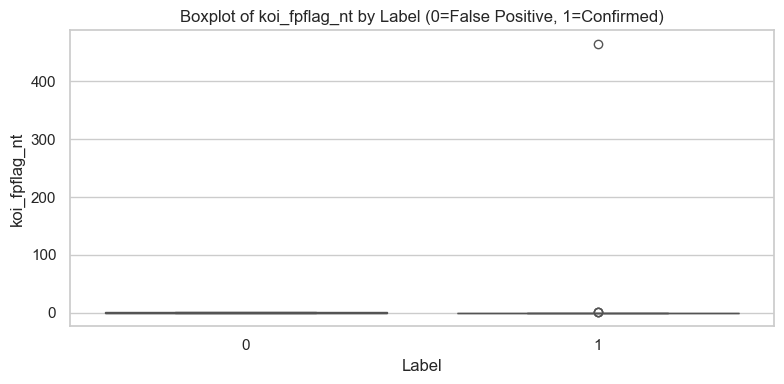

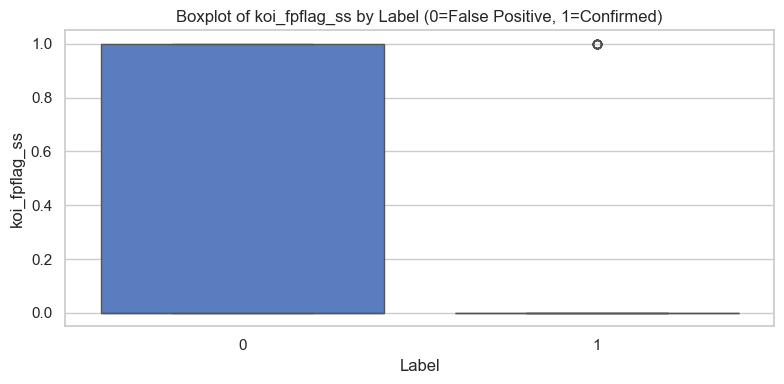

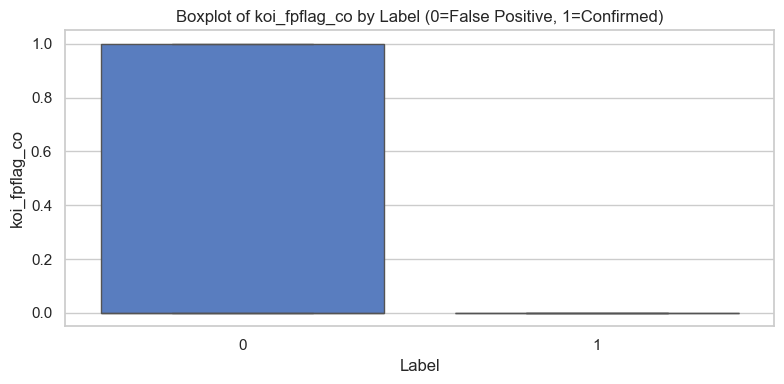

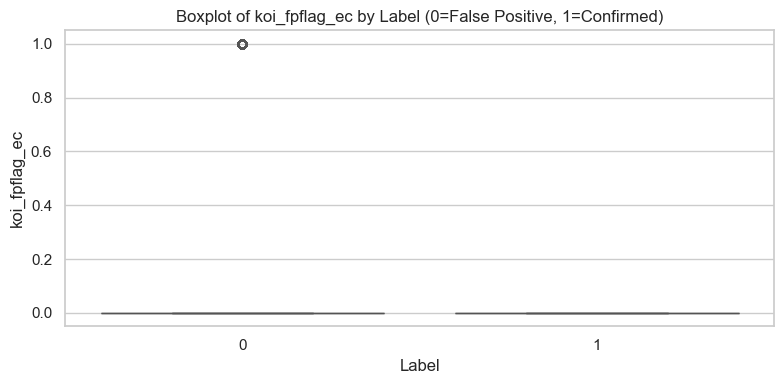

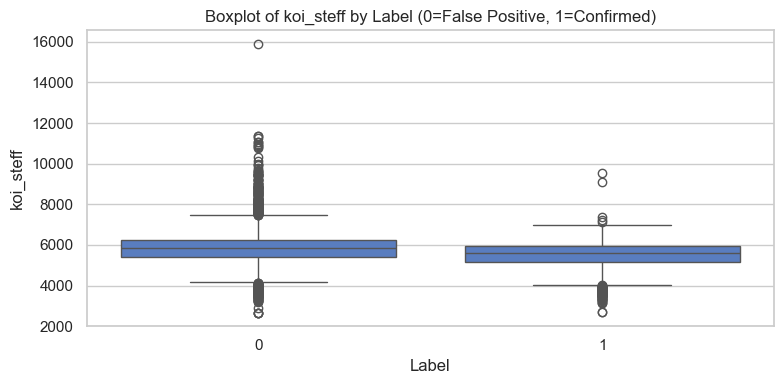

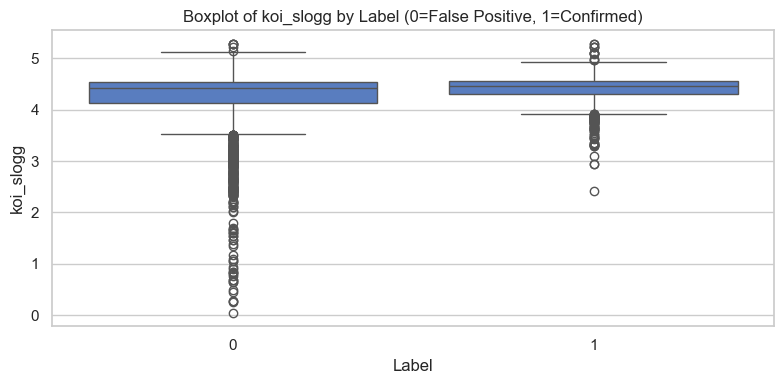

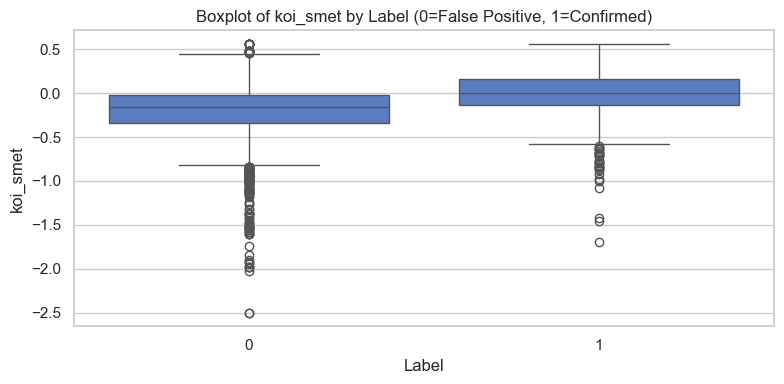

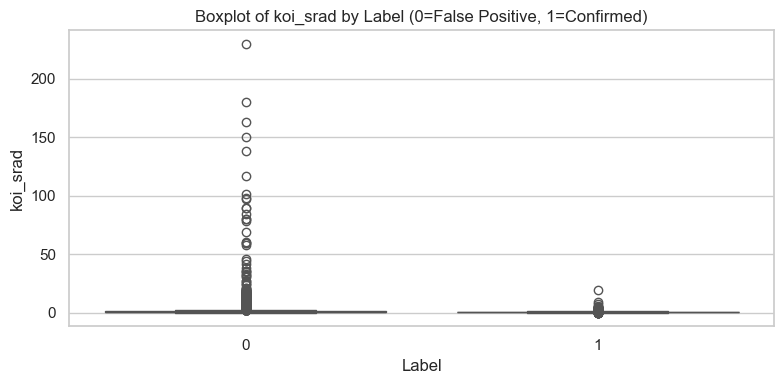

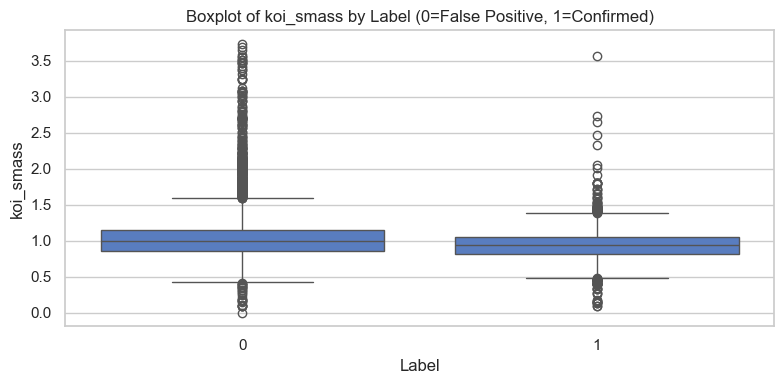

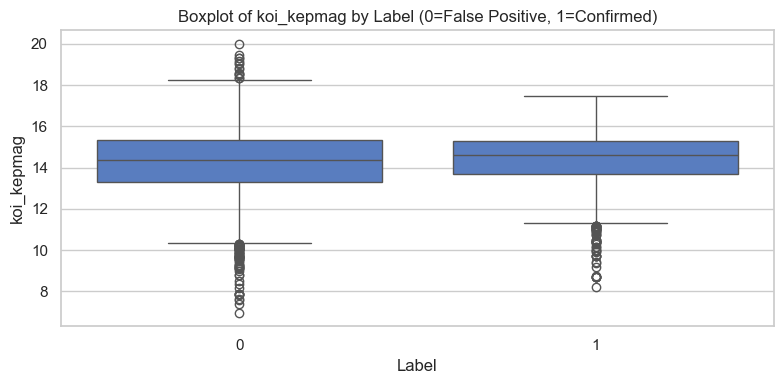

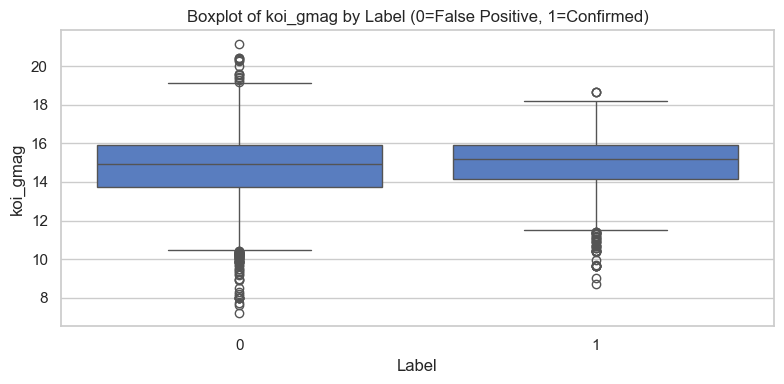

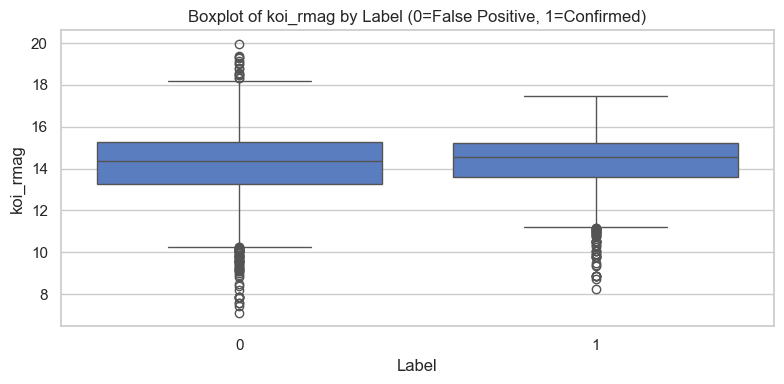

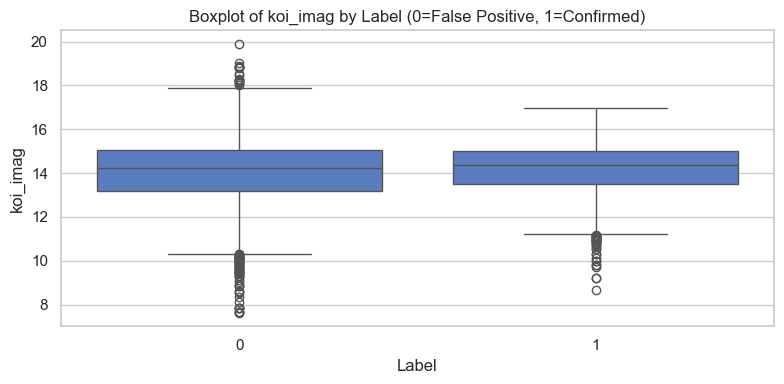

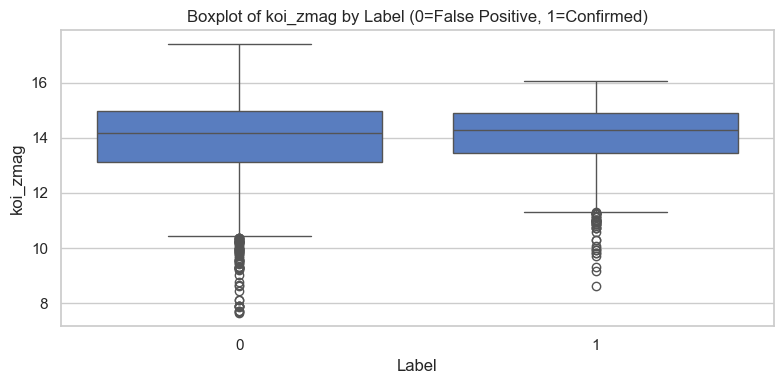

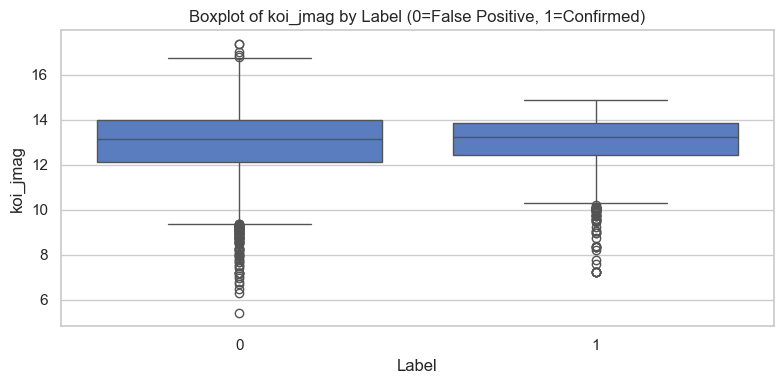

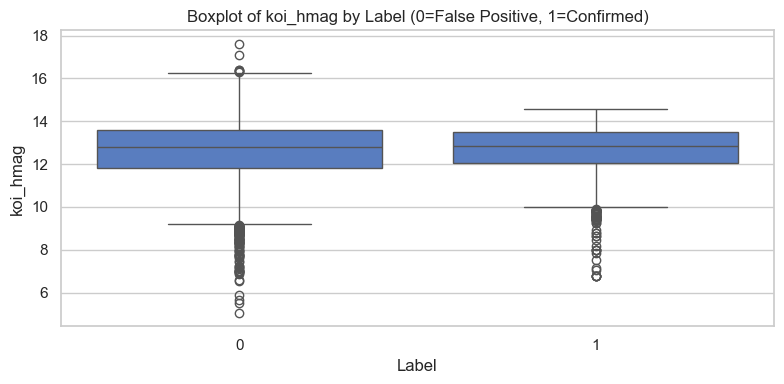

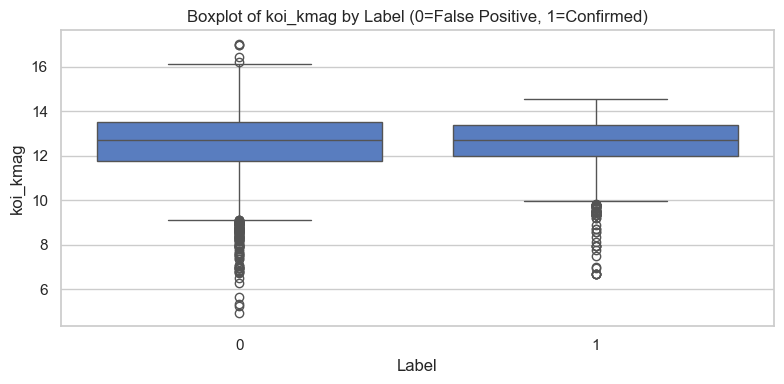

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll visualize a few features at a time to avoid clutter
numeric_cols = df_binary.drop(columns=['label']).select_dtypes(include=['float64', 'int64']).columns

# Configure plot style
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot each feature
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=df_binary)
    plt.title(f'Boxplot of {col} by Label (0=False Positive, 1=Confirmed)')
    plt.xlabel("Label")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

# Quick check
X.head()

In [82]:
missing_summary = df_binary.isnull().mean().sort_values(ascending=False)
missing_summary[missing_summary > 0]

koi_max_mult_ev     0.089782
koi_max_sngle_ev    0.089782
koi_num_transits    0.089782
koi_zmag            0.068425
koi_smet            0.036783
koi_incl            0.034278
koi_slogg           0.034146
koi_srad            0.034146
koi_smass           0.034146
koi_model_snr       0.034146
koi_dor             0.034146
koi_steff           0.034146
koi_teq             0.034146
koi_sma             0.034146
koi_prad            0.034146
koi_ror             0.034146
koi_depth           0.034146
koi_impact          0.034146
koi_srho            0.028873
koi_insol           0.028873
koi_imag            0.016744
koi_gmag            0.004614
koi_jmag            0.003296
koi_hmag            0.003296
koi_kmag            0.003296
koi_rmag            0.000923
koi_kepmag          0.000132
dtype: float64

In [84]:
df_binary = df_binary.fillna(df_binary.median(numeric_only=True))
df_binary.isnull().sum().sum()

np.int64(0)

In [86]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features:", X.shape, " Target:", y.shape)

# Quick check
X.head()

✅ Features: (7585, 35)  Target: (7585,)


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_model_snr,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,9.488036,170.538750,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,35.8,2,142.0,5.135849,28.470820,0,0,0,0,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,54.418383,162.513840,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,25.8,2,25.0,7.027669,20.109507,0,0,0,0,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
3,1.736952,170.307565,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,505.6,1,621.0,39.066550,541.895100,0,1,0,0,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,2.525592,171.595550,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,40.9,1,515.0,4.749945,33.191900,0,0,0,0,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
5,11.094321,171.201160,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,66.5,3,95.0,9.046456,55.204865,0,0,0,0,6046.0,4.486,-0.08,0.972,1.053,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132


In [87]:
from sklearn.model_selection import train_test_split

# Step 1 — Split into training+validation vs test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2 — Split training+validation into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)
# (0.8 × 0.125 ≈ 0.1 → 10% validation)

print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")


Train: (5309, 35)
Validation: (759, 35)
Test: (1517, 35)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Validation Performance:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       484
           1       0.99      0.99      0.99       275

    accuracy                           0.99       759
   macro avg       0.99      0.99      0.99       759
weighted avg       0.99      0.99      0.99       759



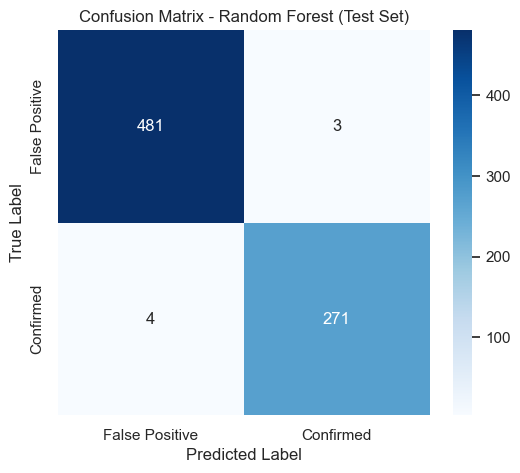

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_scaled, y_train)

# Validation evaluation
y_val_pred = rf.predict(X_val_scaled)
print("Validation Performance:\n", classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Test Performance:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       1.00      0.98      0.99       549

    accuracy                           0.99      1517
   macro avg       0.99      0.99      0.99      1517
weighted avg       0.99      0.99      0.99      1517



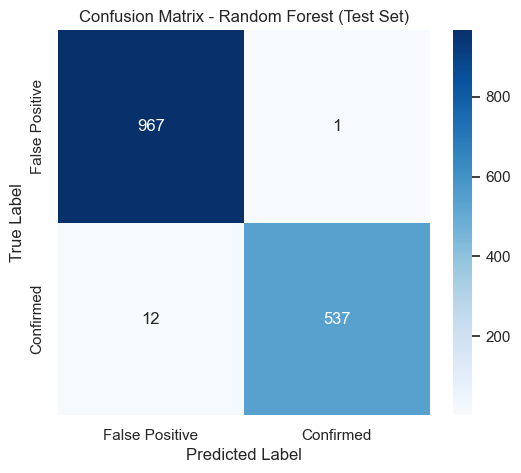

In [ ]:


y_test_pred = rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()